In [3]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
from rasterstats import zonal_stats

plt.style.use("ggplot")

In [2]:
# Connect to the 'general' database as a 'read-only' user
eng = nivapy.da.connect_postgis()

Connection successful.


# Plot locations of 2022 sensor stations and associated sub-catchments

<AxesSubplot:>

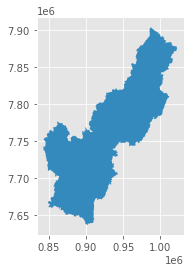

In [23]:
# Get main catchment
fpath = "/home/jovyan/shared/QUANTOM/data/gis/tana_vassdragsomrade.geojson"
vassom_gdf = gpd.read_file(fpath, driver="GeoJSON")
vassom_gdf.plot()

## 1. Major main stem monitoring sites

<AxesSubplot:>

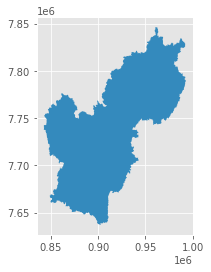

In [24]:
# Polmak
polmak_fpath = r'../data/GIS/shapefiles/Polmak/NedbfeltF_v3.shp'
polmak_gdf = gpd.read_file(polmak_fpath)
polmak_gdf['site_id'] = 'M1'
polmak_gdf['site_name'] = 'Tana_Polmak'
polmak_gdf.set_index('site_id', inplace=True)
# polmak_gdf

In [26]:
# Major southern sub-catchments
southern_rivs_fpath = r"../data/GIS/shapefiles/tana_main_subcatchments.shp"
southern_rivs_gdf = gpd.read_file(main_rivs_fpath)
southern_rivs_gdf.set_index('site_id', inplace=True)
# southern_rivs_gdf

,site_name,lat,lon,catch_area,geometry
site_id,,,,,
M2,Iesjakka,69.42579,24.94077,2081.5829,"MULTIPOLYGON (((864860.000 7702110.000, 864860..."
M4,Anarjohka,69.39845,25.84344,3087.5113,"MULTIPOLYGON (((942470.000 7749590.000, 942480..."
M5,Karasjohka,69.39736,25.14364,2230.3428,"MULTIPOLYGON (((865460.000 7656900.000, 865470..."


/tmp/ipykernel_1224/3043780213.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_rivs_gdf = southern_rivs_gdf.append(polmak_gdf)


<AxesSubplot:>

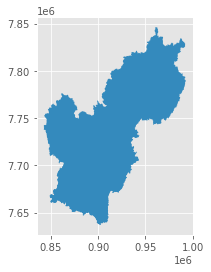

In [29]:
# Join the two and drop M2 (Iesjakka), which isn't being monitored with sensor station in 2022
main_rivs_gdf = southern_rivs_gdf.append(polmak_gdf)
main_rivs_gdf.drop(labels=['M2'], axis=0, inplace=True)
# main_rivs_gdf.plot()

# Small sub-catchments

In [34]:
# Add small sub-catchments
small_scs_fpath = r'../data/GIS/shapefiles/catchment_boundaries_2021.shp'
small_scs_gdf = gpd.read_file(small_scs_fpath)
small_scs_gdf.set_index('site_id', inplace=True)

ids_sensors_2022 = ["3c", "9b", "13b", "14"]

small_scs_gdf = small_scs_gdf.loc[ids_sensors_2022]

small_scs_gdf

,vassdragNr,areal_km2,site_name,geometry
site_id,,,,
3c,234.GBCD2Z,15.76,Skierrejohka,"POLYGON ((853805.177 7715715.254, 853880.985 7..."
9b,234.F3A1Z,19.13,Darjohka,"POLYGON ((934679.771 7803284.682, 934587.250 7..."
13b,234.H5Z,38.35,Mareveadji,"POLYGON ((919812.977 7715112.976, 920075.558 7..."
14,234.GBC1Z,44.74,Cearrogeasjohka,"POLYGON ((870152.773 7735461.797, 870411.465 7..."


# Points

# Plot

<AxesSubplot:>

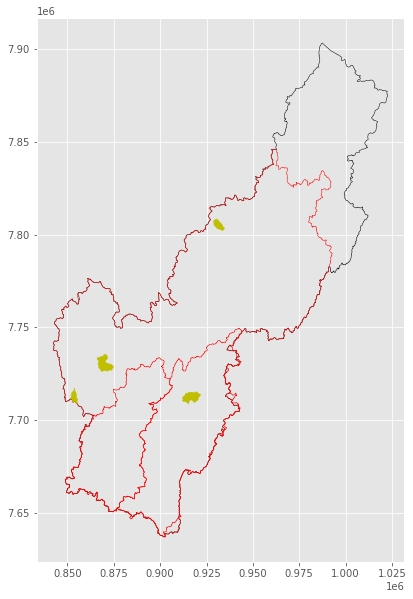

In [43]:
ax = vassom_gdf.plot(figsize=(15, 10), edgecolor="k", facecolor="none")
main_rivs_gdf.plot(ax=ax, edgecolor="r", facecolor="none")
small_scs_gdf.plot(ax=ax, edgecolor="y", facecolor="y")

# cx.add_basemap(ax, crs=main_rivs_gdf.crs, source=cx.providers.Stamen.Terrain)
# ax.set_axis_off()